<a href="https://colab.research.google.com/github/migodelacruz/COMP8220/blob/master/practical_week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

import os
os.chdir('./gdrive/My Drive/COMP8220/Practical/')

# Classifying Iris Species
In this section, we will go through a simple machine learning application and create
our first model. In the process, we will introduce some core concepts and terms.

Let’s assume that a hobby botanist is interested in distinguishing the species of some
iris flowers that she has found. She has collected some measurements associated with
each iris: the length and width of the petals and the length and width of the sepals, all
measured in centimeters.

She also has the measurements of some irises that have been previously identified by
an expert botanist as belonging to the species setosa, versicolor, or virginica. For these
measurements, she can be certain of which species each iris belongs to. Let’s assume
that these are the only species our hobby botanist will encounter in the wild.

Our goal is to build a machine learning model that can learn from the measurements
of these irises whose species is known, so that we can predict the species for a new
iris.

## Explore Data

### 1. Import iris data

In [9]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

The iris object that is returned by load_iris is a Bunch object, which is very similar
to a dictionary. It contains keys and values:

In [10]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


The value of the key DESCR is a short description of the dataset. We show the beginning
of the description here (feel free to look up the rest yourself):

In [11]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


The value of the key target_names is an array of strings, containing the species of
flower that we want to predict:

In [17]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

The value of feature_names is a list of strings, giving the description of each feature:

In [18]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

The data itself is contained in the target and data fields. Data contains the numeric
measurements of sepal length, sepal width, petal length, and petal width in a NumPy
array:

In [28]:
print("Data Array:\n", iris_dataset['data'][0:5])
print("Target Array:\n", iris_dataset['target'][0:5])

Data Array:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Target Array:
 [0 0 0 0 0]


The rows in the data array correspond to flowers, while the columns represent the
four measurements that were taken for each flower:

In [32]:
print(iris_dataset['data'].shape)
print(iris_dataset['target'].shape)

(150, 4)
(150,)


We see that the array contains measurements for 150 different flowers. Remember
that the individual items are called samples in machine learning, and their properties
are called features. The shape of the data array is the number of samples multiplied by
the number of features. This is a convention in scikit-learn, and your data will
always be assumed to be in this shape. Here are the feature values for the first five
samples:

In [33]:
print("First Five Samples - Data Array:\n", iris_dataset['data'][0:5])

First Five Samples - Data Array:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


From this data, we can see that all of the first five flowers have a petal width of 0.2 cm
and that the first flower has the longest sepal, at 5.1 cm.

The target array contains the species of each of the flowers that were measured, also
as a NumPy array. Print 'Type of target':

In [36]:
print("Target Data Type:", type(iris_dataset['target']))

Target Data Type: <class 'numpy.ndarray'>


target is a one-dimensional array, with one entry per flower. Print 'Shape of target':

In [35]:
print("Target Data Shape:", iris_dataset['target'].shape)

Target Data Shape: (150,)


The species are encoded as integers from 0 to 2. Print 'Value of target':

In [38]:
print("Target Data Values:\n", iris_dataset['target'])

Target Data Values:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


The meanings of the numbers are given by the iris['target_names'] array:
0 means setosa, 1 means versicolor, and 2 means virginica.

## Training and Testing Data

We want to build a machine learning model from this data that can predict the species
of iris for a new set of measurements. But before we can apply our model to new
measurements, we need to know whether it actually works—that is, whether we
should trust its predictions.

To assess the model’s performance, we show it new data (data that it hasn’t seen
before) for which we have labels. This is usually done by splitting the labeled data we
have collected (here, our 150 flower measurements) into two parts. One part of the
data is used to build our machine learning model, and is called the training data or
training set. The rest of the data will be used to assess how well the model works; this
is called the test data, test set, or hold-out set.

scikit-learn contains a function that shuffles the dataset and splits it for you: the
train_test_split function. This function extracts 75% of the rows in the data as the
training set, together with the corresponding labels for this data. The remaining 25%
of the data, together with the remaining labels, is declared as the test set. Deciding
how much data you want to put into the training and the test set respectively is somewhat
arbitrary, but using a test set containing 25% of the data is a good rule of thumb.

In scikit-learn, data is usually denoted with a capital X, while labels are denoted by
a lowercase y. This is inspired by the standard formulation f(x)=y in mathematics,
where x is the input to a function and y is the output. Following more conventions
from mathematics, we use a capital X because the data is a two-dimensional array (a
matrix) and a lowercase y because the target is a one-dimensional array (a vector).
Let’s call train_test_split on our data and assign the outputs using this nomenclature:

In [40]:
from sklearn.model_selection import train_test_split

# Set X and y variables
X = iris_dataset['data']
y = iris_dataset['target']

#Split transformed features and target data into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

Before making the split, the train_test_split function shuffles the dataset using a
pseudorandom number generator. If we just took the last 25% of the data as a test set,
all the data points would have the label 2, as the data points are sorted by the label
(see the output for iris['target'] shown earlier). Using a test set containing only
one of the three classes would not tell us much about how well our model generalizes,
so we shuffle our data to make sure the test data contains data from all classes.

To make sure that we will get the same output if we run the same function several
times, we provide the pseudorandom number generator with a fixed seed using the
random_state parameter. This will make the outcome deterministic, so this line will
always have the same outcome. We will always fix the random_state in this way when
using randomized procedures.

The output of the train_test_split function is X_train, X_test, y_train, and
y_test, which are all NumPy arrays. X_train contains 75% of the rows of the dataset,
and X_test contains the remaining 25%:

In [41]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [42]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


## Look at Your Data

Before building a machine learning model it is often a good idea to inspect the data,
to see if the task is easily solvable without machine learning, or if the desired information
might not be contained in the data.

One of the best ways to inspect data is to visualize it. One way to do this is by using a
scatter plot. A scatter plot of the data puts one feature along the x-axis and another
along the y-axis, and draws a dot for each data point.

create dataframe from data in X_train;
label the columns using the strings in iris_dataset.feature_names

In [43]:
import pandas as pd

In [44]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

create a scatter matrix from the dataframe, color by y_train

In [45]:
import mglearn

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f07f703aa90>,
      dtype=object)

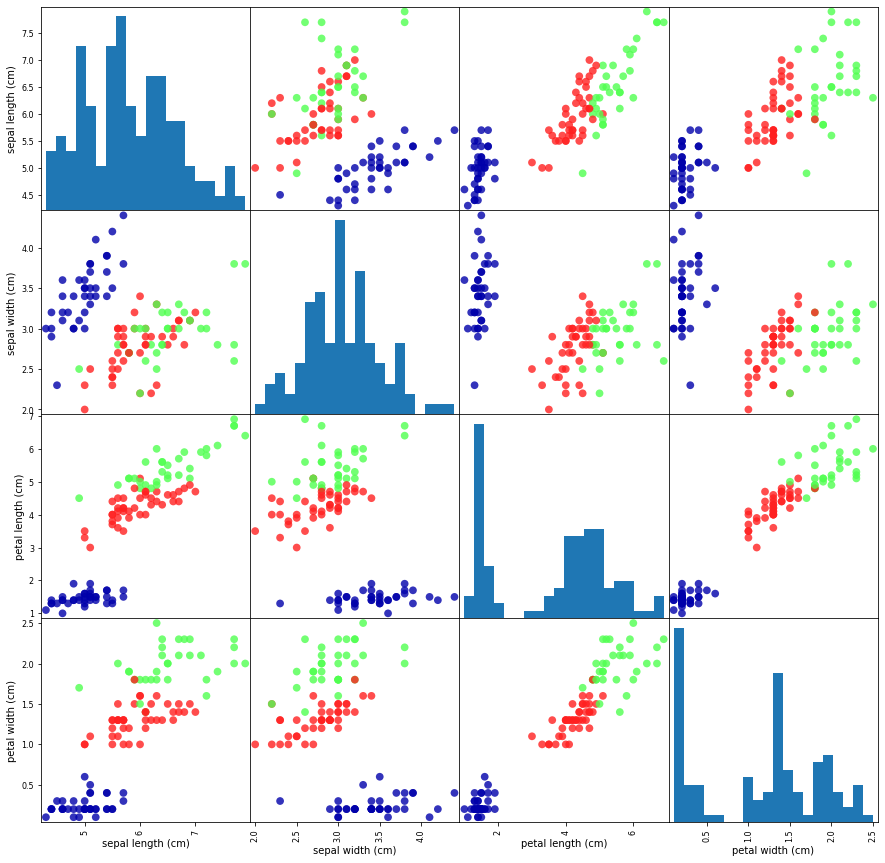

In [46]:
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
marker='o', hist_kwds={'bins': 20}, s=60,
alpha=.8, cmap=mglearn.cm3)

# k-Nearest Neighbors

Now we can start building the actual machine learning model. There are many classification
algorithms in scikit-learn that we could use. Here we will use a k-nearest
neighbors classifier, which is easy to understand. Building this model only consists of
storing the training set. To make a prediction for a new data point, the algorithm
finds the point in the training set that is closest to the new point. Then it assigns the
label of this training point to the new data point.

All machine learning models in scikit-learn are implemented in their own classes,
which are called Estimator classes. The k-nearest neighbors classification algorithm
is implemented in the KNeighborsClassifier class in the neighbors module. Before
we can use the model, we need to instantiate the class into an object. This is when we
will set any parameters of the model. The most important parameter of KNeighborsClassifier is the number of neighbors, which we will set to 1:

In [47]:
from sklearn.neighbors import KNeighborsClassifier

# Create and training a KNN classifier model set to 1
knn = KNeighborsClassifier(n_neighbors = 1)

To build the model on the training set, we call the fit method of the knn object,
which takes as arguments the NumPy array X_train containing the training data and
the NumPy array y_train of the corresponding training labels:

In [48]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

## Making Predictions

We can now make predictions using this model on new data for which we might not
know the correct labels. Imagine we found an iris in the wild with a sepal length of
5 cm, a sepal width of 2.9 cm, a petal length of 1 cm, and a petal width of 0.2 cm.
What species of iris would this be? We can put this data into a NumPy array, again by
calculating the shape—that is, the number of samples (1) multiplied by the number of
features (4):

In [50]:
import numpy as np

X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [51]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


Our model predicts that this new iris belongs to the class 0, meaning its species is
setosa. But how do we know whether we can trust our model? We don’t know the correct
species of this sample, which is the whole point of building the model!

## Evaluating the Model

This is where the test set that we created earlier comes in. This data was not used to
build the model, but we do know what the correct species is for each iris in the test
set.

Testing accuracy is:  0.9473684210526315


Text(0.5, 1.0, 'Test Data - Confusion Matrix')

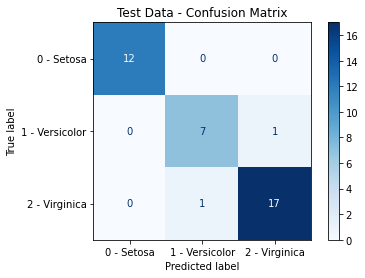

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# Use the model to predict X_test data
y_pred = knn.predict(X_test)

#Get the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)
print('Testing accuracy is: ', accuracy)

disp = plot_confusion_matrix(knn, X_test, y_test, display_labels=['0 - Setosa','1 - Versicolor','2 - Virginica'], cmap=plt.cm.Blues)
disp.ax_.set_title('Test Data - Confusion Matrix')

# Analysing KNeighborsClassifier

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display

In [56]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


The following code produces the visualizations of the decision boundaries shown in Figure.

Text(0, 0.5, 'Feature 1')

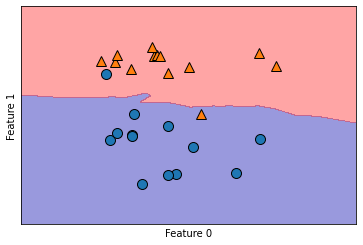

In [57]:
clf = KNeighborsClassifier().fit(X, y)
mglearn.plots.plot_2d_separator(clf, X, fill=True, alpha=.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Analyse the difference with different K [1,3,9] values.

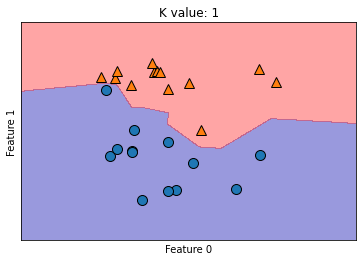

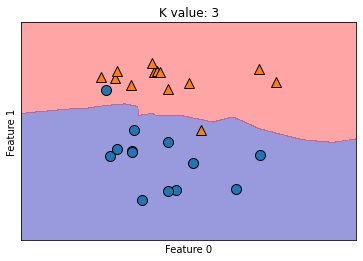

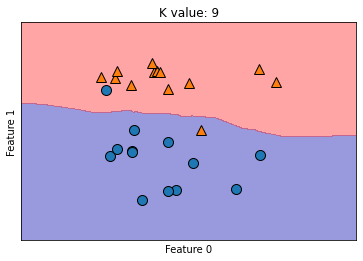

In [62]:
# K value of 1
k_values = [1,3,9]

for k in k_values:
  plt.figure()
  clf = KNeighborsClassifier(n_neighbors=k).fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, alpha=.4)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
  plt.xlabel("Feature 0")
  plt.ylabel("Feature 1")
  plt.title("K value: {}".format(k))

# k-Fold Cross-Validation

In order to train and test our model using cross-validation, we will use the [‘cross_val_score’ function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) with a cross-validation value of 10. ‘cross_val_score’ takes in our k-NN model and our data as parameters. Then it splits our data into 10 groups and fits and scores our data 10 times, recording the accuracy score in an array each time. We will save the accuracy scores in the ‘cv_scores’ variable.

## Data

(1797, 64)


<Figure size 432x288 with 0 Axes>

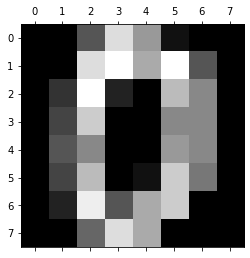

In [72]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

Report the accuracy in each CV as well as the mean accuracy.  
Note:
* k is set to 3, all other parameters are default unless otherwise noted.

In [97]:
from sklearn.model_selection import cross_val_score

# Use Cross validation on the digits dataset using the KNN classifier with k set to 3
X = digits.data
y = digits.target

#Split transformed features and target data into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

# Create the KNN classifier model
knn = KNeighborsClassifier(n_neighbors = 3)
cv_scores = cross_val_score(knn, X_train, y_train, cv=10)

print('\nAccuracy for each round: \n', cv_scores)
print('\nAverage accuracy: %.4f +- %.4f' % (cv_scores.mean(), cv_scores.std()))

knn.fit(X_train, y_train)

X_train Shape: (1347, 64)
X_test Shape: (450, 64)
y_train Shape: (1347,)
y_test Shape: (450,)

Accuracy for each round: 
 [0.97777778 0.96296296 1.         0.99259259 1.         1.
 0.98518519 0.98507463 0.97014925 0.97014925]

Average accuracy: 0.9844 +- 0.0131


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

# Perceptron


Given that you have experienced the instance-based classification algorithm, let's try a model-based classificaftion algorithm.
For the same classification task, please try to build and test a Percetron model, a simple classification model solved by the gradient descent method. Refer to https://scikit-learn.org/stable/modules/linear_model.html#perceptron for more detail.

In [102]:
from sklearn.linear_model import Perceptron

# Create the Perceptron classifier
perceptron = Perceptron(random_state=0)

# Apply cross validation on the perceptron model
cv_scores = cross_val_score(perceptron, X_train, y_train, cv=10)

print('Accuracy for each round: \n', cv_scores)
print('\nAverage accuracy: %.4f +- %.4f' % (cv_scores.mean(), cv_scores.std()))

perceptron.fit(X_train, y_train)

print("\nPerceptron Score:", perceptron.score(X_train,y_train))

Accuracy for each round: 
 [0.94814815 0.9037037  0.94814815 0.92592593 0.93333333 0.94814815
 0.93333333 0.92537313 0.92537313 0.94776119]

Average accuracy: 0.9339 +- 0.0139

Perceptron Score: 0.9725315515961396


Testing accuracy is:  0.9533333333333334


Text(0.5, 1.0, 'Test Data - Confusion Matrix')

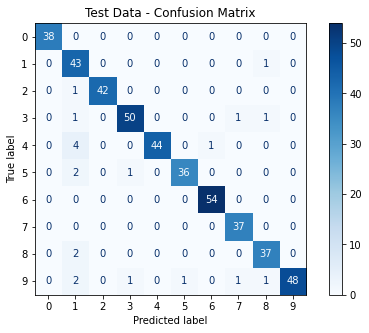

In [100]:
# Test the perceptron model on the test dataset
y_pred = perceptron.predict(X_test)

#Get the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)
print('Testing accuracy is: ', accuracy)

fig, ax = plt.subplots(figsize=(8, 5))

plot_confusion_matrix(perceptron, X_test, y_test, display_labels=digits.target_names, cmap=plt.cm.Blues, ax=ax)
plt.title('Test Data - Confusion Matrix')

Contrary to the KNN classifier, Perceptron has to learn a set of model parameters (the coefficients and the intercept). Please display the learned parameters. Refer to the following link to get the information about the Attributes of the Python Percepton oject: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron.

In [108]:
print("Perceptron Coefficients:", perceptron.coef_)
print("Perceptron Intercept:", perceptron.intercept_)

Perceptron Coefficients: [[   0.  -15.  -35.   18.  -42.  -96.  -42.   -5.    0.  -44.  -13.   17.
    45.   57.  -12.   -6.    0.   26.   36.  -57. -114.  107.  -18.  -10.
     0.   36.   17.  -95. -210.   16.  -11.   -2.    0.   30.   64.  -76.
  -184.  -55.    1.    0.   -4.  -20.  119. -104.  -90.   -1.   10.    0.
   -16.  -46.   50.   -6.   33.   -8.  -51.   -5.    0.  -21.  -61.   52.
   -84.  -39.  -38.  -11.]
 [   0.  -54.    4.   73. -378.  149.  -81.  -22.   -1. -356. -274. -208.
    29.  143. -137.  -21.   22.   42.   78.  453.  259.  -65.   -3.   -8.
     3.   -2.   48.   83. -118.   65. -231.    0.    0. -131.   45.  -63.
    94.  -79. -201.    0.    0. -253.  -61.  -47.  -46. -188. -145.   -1.
    -6. -113.  -58.  116.   77.  -88. -145.  109.   -2.  -49. -118.    5.
    24.  156. -139.   87.]
 [   0.    5.   22.   -2.  -33.  -90.  -41.    0.   -2.   36.   35.  -25.
    78.  -10.   -3.    0.   -1.  -28.   26. -109.   50.   15.   14.    0.
     0.  -90. -223. -182.  -79.  

It is worth noting that Perceptron is a classification algorithm which shares the same underlying implementation with SGDClassifier
(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier). So, it would also interesting to explore SGDClassifier.